In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
pd.options.mode.chained_assignment = None
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Подготовка данных

Для начала импортируем данные и посмотрим на их структру

In [3]:
gold_industry_train = pd.read_csv('/datasets/gold_industry_train.csv', index_col = 'date')
gold_industry_test = pd.read_csv('/datasets/gold_industry_test.csv', index_col = 'date')
gold_industry_full = pd.read_csv('/datasets/gold_industry_full.csv', index_col = 'date')
data = [gold_industry_train, gold_industry_test, gold_industry_full]

Сразу добавим таргетные переменные, чтобы потом не было с этим проблем

In [4]:
gold_industry_train['target_rough'] = gold_industry_full.loc[gold_industry_train.index]['rougher.output.recovery']
gold_industry_train['target_final'] = gold_industry_full.loc[gold_industry_train.index]['final.output.recovery']

gold_industry_test['target_rough'] = gold_industry_full.loc[gold_industry_test.index]['rougher.output.recovery']
gold_industry_test['target_final'] = gold_industry_full.loc[gold_industry_test.index]['final.output.recovery']

In [5]:
def watch_data(dataset):
    print()
    print(dataset.info)

In [6]:
for i in data:
    watch_data(i)


<bound method DataFrame.info of                      rougher.input.feed_au  rougher.input.feed_ag  \
date                                                                
2016-01-15 00:00:00               6.486150               6.100378   
2016-01-15 01:00:00               6.478583               6.161113   
2016-01-15 02:00:00               6.362222               6.116455   
2016-01-15 03:00:00               6.118189               6.043309   
2016-01-15 04:00:00               5.663707               6.060915   
...                                    ...                    ...   
2017-12-09 09:59:59               4.599524               5.822083   
2017-12-09 10:59:59               4.658125               5.844800   
2017-12-09 11:59:59               5.335862               6.091855   
2017-12-09 12:59:59               4.838619               6.121323   
2017-12-09 13:59:59               4.525061               5.970515   

                     rougher.input.feed_pb  rougher.input.feed_sol  \

In [7]:
gold_industry_train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,target_rough,target_final
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000,14579.000000,14579.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745,82.521200,66.759066
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075,15.797521,10.619709
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412,80.558542,63.114596
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515,85.946497,67.962788
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827,89.960375,72.598187
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730,100.000000,100.000000


In [8]:
gold_industry_test.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,target_rough,target_final
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4860.000000,4860.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924,85.750584,67.923574
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186,6.648023,8.414134
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800,18.491446,5.586496
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501,82.354512,63.939233
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769,86.839027,68.744713
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134,90.145117,73.037434
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459,100.000000,100.000000


In [9]:
gold_industry_full.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


In [10]:
print(gold_industry_train.isnull().sum())

rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb      72
rougher.input.feed_sol     77
rougher.input.feed_rate     7
                           ..
final.output.tail_ag        1
final.output.tail_pb       75
final.output.tail_sol       5
target_rough                0
target_final                0
Length: 88, dtype: int64


In [11]:
print(gold_industry_test.isnull().sum())

rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0
rougher.state.floatbank10_f_level               0


In [12]:
print(gold_industry_full.isnull().sum())

rougher.input.feed_au        0
rougher.input.feed_ag        0
rougher.input.feed_pb      100
rougher.input.feed_sol      99
rougher.input.feed_rate     11
                          ... 
final.output.recovery        0
final.output.tail_au         0
final.output.tail_ag         1
final.output.tail_pb       101
final.output.tail_sol        6
Length: 86, dtype: int64


Не замечено много пропусков в данных, поэтому чтобы никак эти данные не повредить, решено было просто удалить все пропуски, также удалим дубликаты если они есть, столбцы с датой я также удалю чтобы в дальнейшем они не вызывали никаких ошибок, ведь смысла они в себе не несут

In [13]:
for i in ['train', 'test', 'full']:
    exec(f"gold_industry_{i} = gold_industry_{i}.dropna()")
    exec(f"gold_industry_{i} = gold_industry_{i}.drop_duplicates()")

Далее нам необходимо создать новый столбец и сравнить его с имеющимся

In [14]:
gold_industry_train['efficiency'] = ((gold_industry_train['rougher.output.concentrate_au']*(gold_industry_train['rougher.input.feed_au'] - gold_industry_train['rougher.output.tail_au']))/ (gold_industry_train['rougher.input.feed_au']*(gold_industry_train['rougher.output.concentrate_au'] - gold_industry_train['rougher.output.tail_au'])))*100     
print(mean_absolute_error(gold_industry_train['efficiency'], gold_industry_train['rougher.output.recovery']))

9.906677443564516e-15


MAE очень мала, а значит данные правдивы

Что касается количества призаков в тестовой и обучающей выборке, в тестовой действительно нету 30 признаков, возможно это связано с онлайн и оффлайн признаками. Имеется ввиду что многие признаки, которые есть в обучающей недоступны в тестовой с той целью, чтобы в реальной ситуации модель точно работала хорошо и поэтому оставили только те признаки, которые возможно отследить.

## Анализ данных

Для начала проанализируем количество концентрата на различных этапах, для этого построим гистограммы для каждого из металлов

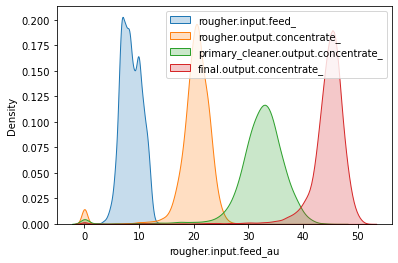

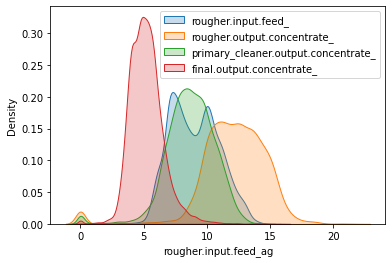

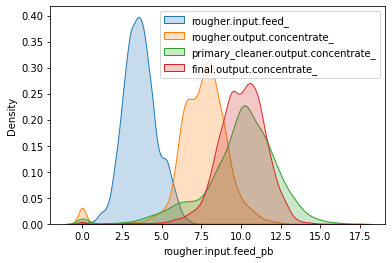

In [15]:
for i in ['au', 'ag', 'pb']:    
    for stage in ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']:
        exec(f"snsplot_{i} = sns.kdeplot(gold_industry_full['{stage}{i}'], shade=True)")
        exec(f"fig = snsplot_{i}.get_figure()")
    plt.legend(labels=['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_'])
    plt.show()     

На самом деле, я ожидал что все графики будут выглядеть как графики с золотом, где у нас на каждом эатпе очистки увеличивается концентрация. Но аргентум меня очень сильно удивил, так как оказалось что у него самая большая концентрация на втором этапе, а самая маленькая на последнем. Что касается свинца, то с ним все тоже более менее логично, но не уверен что послдений этап обработки окупается, так как концентрата в среднем становится больше, но очень незначительно

Также можно убрать все нулевые значения, но наверное пока что я так делать ну буду, потому что возможно это не ошибка, я дейтсвительно просто нулевая концентрация

На следующем этапе я хочу построить боксплоты, чтобы посмотреть распределение размера гранул в тестовой и обучающей выборках

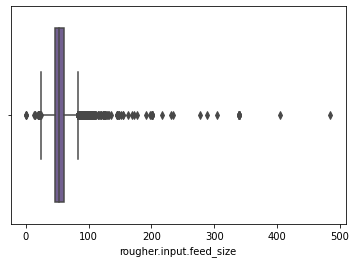

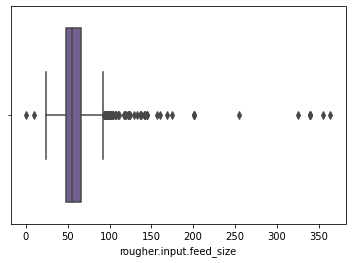

In [16]:
for i in ['train', 'test']:
    colors = ['#705898']
    exec(f"sns.boxplot(x = gold_industry_{i}['rougher.input.feed_size'], palette=colors)")
    plt.show()

На графиках заметно огромное количество выбросов, их правильно было бы удалить, поэтому этим и займусь, после этого сделаю диаграмму плотности

In [17]:
gold_industry_train = gold_industry_train[gold_industry_train['rougher.input.feed_size'] <= 100]
gold_industry_test = gold_industry_test[gold_industry_test['rougher.input.feed_size'] <= 100]
gold_industry_full = gold_industry_full[gold_industry_full['rougher.input.feed_size'] <= 100]

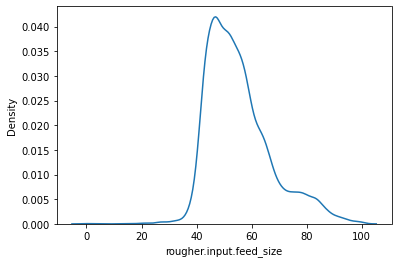

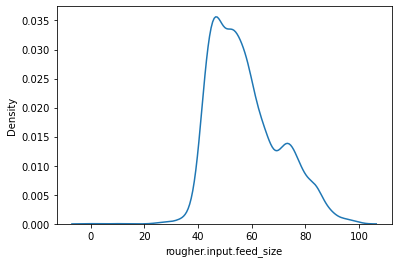

In [18]:
for i in ['train', 'test']:
    colors = ['#705898']
    exec(f"sns.kdeplot(x = gold_industry_{i}['rougher.input.feed_size'], palette=colors)")
    plt.show()

После построение kde графика значения вполне нормального распределения, можно удалить все значения меньше 20 так как их даже меньше 1%

In [19]:
gold_industry_train = gold_industry_train[gold_industry_train['rougher.input.feed_size'] > 20]
gold_industry_test = gold_industry_test[gold_industry_test['rougher.input.feed_size'] > 20]
gold_industry_full = gold_industry_full[gold_industry_full['rougher.input.feed_size'] > 20]

Чтобы сделать гистограмму нам нужно сделать отдельные столбцы, для этого я буду использовать новый датасет, созданный из сумм кнцентраций всех металлов

In [28]:
gold_industry_full['rougher_input'] = gold_industry_full['rougher.input.feed_au']+ gold_industry_full['rougher.input.feed_ag']+gold_industry_full['rougher.input.feed_pb'] + gold_industry_full['rougher.input.feed_sol']
gold_industry_full['rougher_output'] = gold_industry_full['rougher.output.concentrate_au']+gold_industry_full['rougher.output.concentrate_ag']+gold_industry_full['rougher.output.concentrate_pb']+gold_industry_full['rougher.output.concentrate_sol']
gold_industry_full['primary_cleaner'] = gold_industry_full['primary_cleaner.output.concentrate_au']+gold_industry_full['primary_cleaner.output.concentrate_ag']+gold_industry_full['primary_cleaner.output.concentrate_pb']+gold_industry_full['primary_cleaner.output.concentrate_sol']
gold_industry_full['finaloutput'] = gold_industry_full['final.output.concentrate_au'] + gold_industry_full['final.output.concentrate_ag'] + gold_industry_full['final.output.concentrate_pb'] + gold_industry_full['final.output.concentrate_sol']

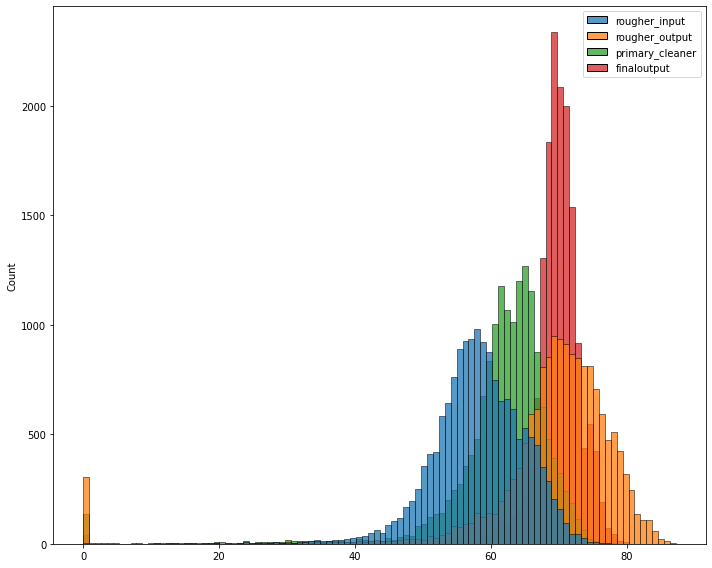

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
hist_sum = sns.histplot([gold_industry_full['rougher_input'], gold_industry_full['rougher_output'], gold_industry_full['primary_cleaner'], gold_industry_full['finaloutput']], bins = 100)

plt.tight_layout()
plt.show()

Мы получили наглядное изображение суммарной концентрации на каждом из этапов, отчетливо видно, что имеется очень много зачений равных или чуть чуть больше нуля, это явные аномалии, которые стоит убрать

In [34]:
for col in ['rougher_input', 'rougher_output', 'primary_cleaner', 'finaloutput']:
    gold_industry_full = gold_industry_full[gold_industry_full[col]>0]
gold_industry_train = gold_industry_train.loc[gold_industry_train.index.isin(gold_industry_full.index)]

## Модель

Следущий шаг это построение моделей и функции smape

In [35]:
def smape(y_true, y_pred):
    smape = (100 / len(y_pred)) * np.sum(2 * abs(y_true - y_pred) / (abs(y_true) + abs(y_pred)))
    return smape

def total_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape + 0.75 * final_smape

smape_score = make_scorer(smape,greater_is_better = False)

Теперь добавим в тестовую и обучающую выборки таргетные переменные из полного датасета

Добавили таргетный признак в обе талицы, теперь будем убирать ненужные признаки

In [36]:
train = [column for column in gold_industry_train]
test = [column for column in gold_industry_test]
full = [column for column in gold_industry_full]

In [37]:
for i in train:
    if i in test:
        continue
    else:
        gold_industry_train = gold_industry_train.drop(i, axis = 1)

Во время деления на таргетные переменные и признаки могут образоваться нули, поэтому проверим и заменим их на медианы если их очень мало

In [38]:
features_test = gold_industry_test.drop(['target_rough', 'target_final'], axis=1)
target_test_rough = gold_industry_test['target_rough']
target_test_final = gold_industry_test['target_final']
features_train = gold_industry_train.drop(['target_rough', 'target_final'], axis=1)
target_train_rough = gold_industry_train['target_rough']
target_train_final = gold_industry_train['target_final']
print(target_test_rough.isnull().sum())
print(target_test_final.isnull().sum())
print(target_train_rough.isnull().sum())
print(target_train_final.isnull().sum())

0
0
0
0


Теперь приведем масштабирование признаков

In [39]:
scaler = StandardScaler()
scaler.fit(features_train) 
features_train = pd.DataFrame(scaler.transform(features_train), index=features_train.index, columns=features_train.columns)
features_test = pd.DataFrame(scaler.transform(features_test), index=features_test.index, columns=features_test.columns)

Подбираем лучшую модель

In [26]:
model_rough_rf = RandomForestRegressor()
parametrs = { 'n_estimators': [50, 100, 150],
              'max_depth': [10 , 15]}
grid_rough_rf = GridSearchCV(model_rough_rf, parametrs, cv=3, scoring = smape_score, n_jobs = -1)
grid_rough_rf.fit(features_train, target_train_rough)

print(grid_rough_rf.best_params_)
print('smape_rough =',grid_rough_rf.best_score_)

{'max_depth': 10, 'n_estimators': 150}
smape_rough = -13.710963417277389


In [27]:
model_final_rf = RandomForestRegressor()
parametrs = { 'n_estimators': [50, 100, 150],
              'max_depth': [10 , 15]}
grid_final_rf = GridSearchCV(model_final_rf, parametrs, cv=3, scoring = smape_score, n_jobs = -1)
grid_final_rf.fit(features_train, target_train_final)
print(grid_final_rf.best_params_)
print('smape_final =', grid_final_rf.best_score_)

{'max_depth': 10, 'n_estimators': 150}
smape_final = -10.372498393103353


In [27]:
model_rough_lr = LinearRegression()
scores = cross_val_score(model_rough_lr, features_train, target_train_rough, cv=5, scoring = smape_score)
print('Средняя оценка качества модели:', scores.mean() * (-1))

Средняя оценка качества модели: 15.766585332354248


In [28]:
model_final_lr = LinearRegression()
scores_final = cross_val_score(model_final_lr, features_train, target_train_final, cv=5, scoring = smape_score)
print('Средняя оценка качества модели:', scores_final.mean() * (-1))

Средняя оценка качества модели: 9.782010199451353


Подсчитаем финальный SMAPE чтобы понять какая модель лучше

In [ ]:
print('Random forest SMAPE:', total_smape(grid_rough_rf.best_score_ * (-1), grid_final_rf.best_score_ * (-1)))
print('Linear regression SMAPE:', total_smape(scores.mean() * (-1),scores_final.mean() * (-1)))

Линейная регрессия показала результаты хуже, а значит будем проверять тестовую выборку на Рандомном лесу

также построим константную модель, чтобы проверить модель на адекватность

In [40]:
dummy_prediction_target_test_rough = target_test_rough.copy()
dummy_prediction_target_test_rough.loc[:] = target_test_rough.mean()

dummy_prediction_target_test_final = target_test_final.copy()
dummy_prediction_target_test_final.loc[:] = target_test_final.mean()

dummy_smape_rough = smape(target_test_rough, dummy_prediction_target_test_rough)
dummy_smape_final = smape(target_test_final, dummy_prediction_target_test_final)

print('smape rougher.output.recovery, константная модель:', dummy_smape_rough)

print('smape final.output.recovery, константная модель:', dummy_smape_final)

print('Итоговая smape:', total_smape(dummy_smape_rough, dummy_smape_final))

smape rougher.output.recovery, константная модель: 5.883249417570005
smape final.output.recovery, константная модель: 8.961911993881786
Итоговая smape: 8.192246349803842


Константная модель получилась равна по итогу 8.19, достаточно высокий показатель

Теперь мы проверим модель на тестовой выборке

In [41]:
best_model_rough = RandomForestRegressor(n_estimators = 100, max_depth = 10, random_state = 0)
best_model_final = RandomForestRegressor(n_estimators = 100, max_depth = 10, random_state = 0)
best_model_rough.fit(features_train, target_train_rough)
best_model_final.fit(features_train, target_train_final)
final_smape_rough = smape(target_test_rough, best_model_rough.predict(features_test))
final_smape_final = smape(target_test_final, best_model_final.predict(features_test))
total_total_smape = total_smape(final_smape_rough, final_smape_final)
total_total_smape

5.545287211644184

Получилось достаточно низкое значение итогового SMAPE, а значит модель очень хорошо предсказывает наши значения

Общий вывод: в итоговой функции с помощью нескольких видов машинного обучения получилось выучить модель которая предсказывает значения коэффицентов с достаточно низкой ошибкой, что не может не радовать